In [18]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
fi = "indata/3pipes3.inp"     #location of .inp file
fc = "indata/3pipes3.config"  #location of .config file
#fi = "indata/triple0.inp"     #location of .inp file
#fc = "indata/triple0.config"  #location of .config file
mtype = 1                       #model used along network edges. 1 for Preissman Slot. 0 for uniform
n1 = PyNetwork(fi, fc, mtype)   #a network object
print n1 
print n1.a


Network at address 0x7f903a5043b0 with 4 nodes and 3 edges

[120.0, 120.0, 120.0]


In [12]:
#n1.showCurrentData()    
dt = n1.T/n1.M
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)  #solve up to time T


In [13]:
print "Elapsed time is %.5f s, solve time is %.5f s" %(n1.T,n1.solve_time)
print "Initial Volume is %f"%V0
print "Final Volume is   %f" %n1.getTotalVolume()
dV = V0-n1.getTotalVolume()
Qo = n1.T*3
print "dV =%f" % dV
print "Qo =%f" %Qo
print "percent error is %e"%(dV/V0)

Elapsed time is 50.00000 s, solve time is 16.82766 s
Initial Volume is 168.393590
Final Volume is   167.867336
dV =0.526254
Qo =150.000000
percent error is 3.125142e-03


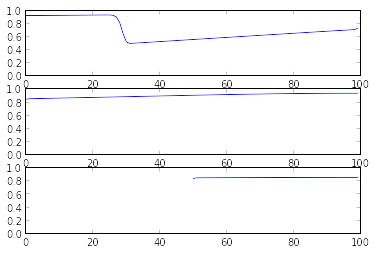

0.775456445244
[3.885738322452288, 4.0089515226700545, 3.4204085734970455]
cmax*dt/dx = 0.857201 
0.728470563139
0.848809355903
0.843979381396
max H is 0.933760 0.941339 0.859230
14.5509248354
396.434164663


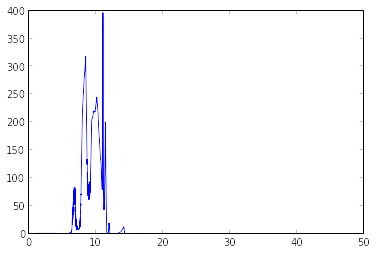

In [14]:
qi = [n1.q(i) for i in range(n1.Nedges)]
hi = [n1.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n1.Ns[i]] for i in range(3)]
Qi = [qi[i][n1.Ns[i]:] for i in range(3)] 
u= []
ymaxs = [ceil(max(h)) for h in hi]
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n1.Ns[i])])
fig,ax = plt.subplots(nrows = n1.Nedges)
x0 = [0,0,100.-n1.Ns[2]]
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
    ax[k].set_ylim([0,ymaxs[i]])
    ax[k].set_xlim([0,100])
    ax[k].set_yticks(np.linspace(0,ymaxs[i],6))
plt.show()
print n1.getAveGradH(600)
umax = max(abs(max(ui)) for ui in u)
print n1.cmax
print "cmax*dt/dx = %f "%((max(n1.a)+umax)*dt/n1.Ls[0]*n1.Ns[0])
print hi[0][99]
print hi[1][0]
print hi[2][0]
print "max H is %f %f %f"%(max(hi[0]), max(hi[1]), max(hi[2]))
Hbar = [n1.getAveGradH(i) for i in range(n1.M+1)]
print mean(Hbar)
t = np.linspace(0,n1.T,n1.M+1)
plot(t,Hbar)
print max(Hbar)

In [15]:
ndof = 16
wn = np.array([1,2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
opt1 = PyBC_opt_dh(fi, fc, ndof, x0, 0, wn)
opt1.compute_f()
f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype

f is 510.200955
T is 50.000000
Using Hermite modes


In [6]:
opt1.solve()
#opt1.x
#opt1.r


Final f/Initial f  = 0.487920950882816


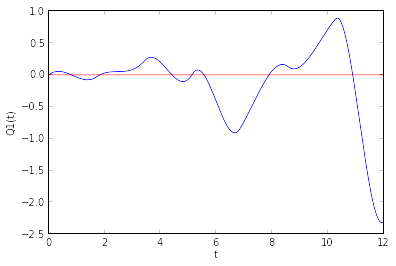

In [7]:
#import matplotlib.pyplot as plt
ff = opt1.f
Q1 = opt1.getBCtimeseries(0)
Q2 = opt1.getBCtimeseries(1)
print "Final f/Initial f  = %.15f"%(ff/f0)
t = np.linspace(0,opt1.T, opt1.M+1)
plot(t,Q1,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q1(t)')



[1.3257630861645203e-05, 0.3429475137414354, -0.031108097969652356, 0.31199420117503673, 0.21891344710721963, 0.5073303150797684, 0.008104284564440055, 0.7429898472113421, -0.8415152783084979, 0.7229123927313083, 0.13065578493669058, -0.3505577068114451, 0.8769587097562814, 0.46489563354615554, -2.297320872294455, 0.5280396712530049, 4.7556680771943217e-07, -3.410758365114258e-05, 1.214035546999033e-05, -6.141367042951864e-05, 0.0005621198418997908, -0.007082990212250172, -0.0005156578009659928, 2.520055215704142e-05, 3.927960087049955e-05, 0.00011106329245009684, -5.578405337485049e-05, 1.0323838396175751e-05, 0.398872949173353, -0.6387591547160044, 2.953403999389728, -0.6952114175124762]


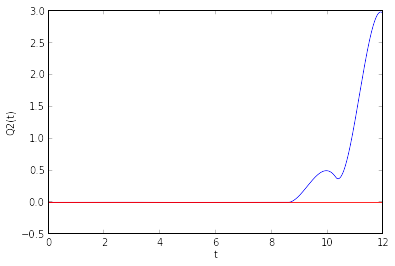

In [8]:
plot(t,Q2,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q2(t)')
n1.Ns
n1.a

print opt1.x